## Load Data from various Data Sources
Load data with Pandas Datareader from:  
* Tiingo
* IEX
* Alpha Vantage
* Econdb
* Enigma
* Quandl
* St.Louis FED (FRED)
* Kenneth French’s data library
* World Bank
* OECD
* Eurostat
* Thrift Savings Plan
* Nasdaq Trader symbol definitions
* Stooq
* MOEX
* Naver Finance
* Yahoo Finance

Further Data Sources:
* https://eodhistoricaldata.com  

Docs: https://pydata.github.io/pandas-datareader/remote_data.html#remote-data-oecd

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pandas_datareader.data as web
from datetime import datetime
from pandas_datareader import DataReader, wb
from pandas_datareader.famafrench import get_available_datasets

In [3]:
def yahoo(symbol, start_date, end_date):
    data = DataReader(symbol, 'yahoo', start_date, end_date)
    data = data.reset_index()
    data.columns = [string.lower() for string in data.columns]
    data = data.set_index('date')
    return data


def stooq(symbol, start_date, end_date):
    """
    Google finance doesn’t provide common index data download. 
    The Stooq site has the data for download.
    
    Indices: ^DJI, ^SPX
    """
    data = DataReader(symbol, 'stooq', start_date, end_date)
    return data


def alphavantage(symbol, endpoint, start_date, end_date, API_key='6CW00BRWT0A7FTMF'):
    """
    Alpha Vantage provides realtime equities and forex data. 
    Through the Alpha Vantage Time Series endpoints, it is possible to obtain 
    historical equities and currency rate data for individual symbols. 
    For daily, weekly, and monthly frequencies, 20+ years of historical data 
    is available. The past 3-5 days of intraday data is also available.

    The following endpoints are available:

    av-intraday - Intraday Time Series
    av-daily - Daily Time Series
    av-daily-adjusted - Daily Time Series (Adjusted)
    av-weekly - Weekly Time Series
    av-weekly-adjusted - Weekly Time Series (Adjusted)
    av-monthly - Monthly Time Series
    av-monthly-adjusted - Monthly Time Series (Adjusted)
    av-forex-daily - Daily Time Series
    
    https://www.alphavantage.co/documentation/
    """
    data = DataReader(symbol, endpoint, start=start_date, end=end_date, api_key=API_key)
    return data



def search_av_symbol(search, API_key='6CW00BRWT0A7FTMF'):
    """
    The Search Endpoint returns the best-matching symbols and market 
    information based on keywords of your choice
    
    search_av_symbol('alphabet')
    """
    url = f"https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={search}&apikey={API_key}"
    r = requests.get(url)
    data = r.json()
    for match in data['bestMatches']:
        print(f"Symbol: {match['1. symbol']}")
        print(f"Name:   {match['2. name']}\n")
        
        
        
def quandl(symbol, start_date, end_date, API_key='7ps1oZLG3TeuVnk3mmBP'):
    """
    Quandl is now Nasdaq Data Link
    Daily financial data (prices of stocks, ETFs etc.) from Quandl. The symbol names consist of two 
    parts: DB name and symbol name. DB names can be all the free ones listed on the Quandl website. 
    Symbol names vary with DB name; for WIKI (US stocks), they are the common ticker symbols, in 
    some other cases (such as FSE) they can be a bit strange. Some sources are also mapped to suitable 
    ISO country codes in the dot suffix style shown above, currently 
    available for BE, CN, DE, FR, IN, JP, NL, PT, UK, US.
    
    WIKI/GSPC ... S&P 500 
    """
    data = web.DataReader(symbol, 'quandl', start_date, end_date)
    return data



def famafrench(symbol):
    """
    Access datasets from the Fama/French Data Library. 
    get_available_datasets() -> function that returns a list of all available datasets
    
    http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
    """
    data = DataReader(symbol, 'famafrench')
    return data



def econdb():
    """
    Econdb provides economic data from 90+ official statistical agencies. 
    Free API allows access to the complete Econdb database of time series aggregated into datasets.
    
    https://www.econdb.com/
    """
    pass



def fred(symbol, start_date, end_date):
    """
    Economic Data from the Federal Reserve Bank St. Louis
    https://fred.stlouisfed.org/
    """
    data = DataReader(symbol, 'fred', start_date, end_date)
    return data



def worldbank(symbol, countries, start_date, end_date):
    """
    Easily access thousands of panel data series from the World Bank’s 
    World Development Indicators by using the wb I/O functions.
    
    matches = wb.search("gdp.*capita.*const")  --> Search for Indicators
    
    https://data.worldbank.org/
    """
    data = wb.download(indicator=symbol, country=countries, start=start_date.year, end=end_date.year)
    return data



def oecd(symbol):
    """
    OECD Statistics are available via DataReader. You have to specify OECD’s data set code.
    
    https://stats.oecd.org/
    """
    data = DataReader(symbol, 'oecd')
    return data



def eurostat(symbol):
    """
    European Statistics
    
    https://ec.europa.eu/eurostat/
    """
    data = DataReader(symbol, 'eurostat') 
    return data

### Load Data

In [4]:
start_date = datetime(2000, 1, 1) 
end_date   = datetime(2022, 3, 18) 
freq = 'D' # W-Mon

#data = yahoo("^VIX", start_date, end_date, freq)
data = alphavantage("DJI", "av-daily", start_date, end_date)
#data = quandl("EOD/SPXC", start_date, end_date)
#data = fred("GDP", start_date, end_date)
#data = famafrench("F-F_Research_Data_Factors")
#data = worldbank("NY.GDP.PCAP.KD", ['US', 'CA', 'MX'], start_date, end_date)
#data = oecd("TUD")
#data = eurostat("tran_sf_railac")
#data = stooq("^SPX", start_date, end_date)

<AxesSubplot:xlabel='date'>

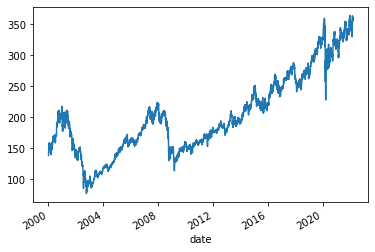

In [8]:
data.close.plot()

### Save data to .csv 

In [136]:
path = "C:/Users/Stefa/Documents/Uni/Projektassistenz/Financial Data/"

data.to_csv(path+'SP500_OHLC_stooq.csv', encoding='utf-8')

In [1]:
# Test